**In this notebook we are going to explore various analyzing tools and find out how spotify top 50 songs are behaving.**

In [24]:
# install the prerequisite libraries
from scipy.stats import boxcox


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import squarify as sq
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [25]:
# import the dataset and show the first 10 rows
df = pd.read_csv('data_top50.csv', encoding='ISO-8859-1')
df.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,185,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [26]:
# shows the statics of the dataset
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,25.500,120.060,64.060,71.38,-1.840,14.660,54.600,200.960,22.160,12.480,87.500
std,14.577,30.898,14.232,11.93,27.041,11.118,22.336,39.144,18.996,11.162,4.491
min,1.000,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,13.250,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,25.500,104.500,66.500,73.50,-5.500,11.000,55.500,198.000,15.000,7.000,88.000
75%,37.750,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,50.000,190.000,88.000,90.00,185.000,58.000,95.000,309.000,75.000,46.000,95.000


In [27]:
# shape of the dataset
df.shape

(50, 14)

In [28]:
# Renaming the columns
df.rename(columns={'Track.Name': 'track_name', 'Artist.Name': 'artist_name',
                   'Beats.Per.Minute': 'beats_per_minute', 'Loudness..dB..': 'Loudness(dB)',
                   'Valence.': 'Valence', 'Length.': 'Length', 'Acousticness..': 'Acousticness',
                   'Speechiness.': 'Speechiness'}, inplace=True)
df.head()

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,185,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [29]:
# finds the null values/ empty values in the dataset and fills them with 0
print(df.isnull().sum())
df.fillna(0)

Unnamed: 0          0
track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64


,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,185,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [30]:
# The datatypes of the different attributes of the dataset
df.dtypes

Unnamed: 0           int64
track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object

In [31]:
# shows all types of hip hop genre and how many songs belongs to each categary
df['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
country rap         2
brostep             2
panamanian pop      2
electropop          2
reggaeton flow      2
reggaeton           2
dfw rap             2
canadian pop        2
pop house           1
escape room         1
atl hip hop         1
r&b en espanol      1
australian pop      1
boy band            1
big room            1
trap music          1
Name: Genre, dtype: int64

In [32]:
# shows artists with no.of songs
df['artist_name'].value_counts()

Ed Sheeran          4
Shawn Mendes        2
Ariana Grande       2
Post Malone         2
J Balvin            2
Marshmello          2
Sech                2
Lil Nas X           2
The Chainsmokers    2
Billie Eilish       2
Lewis Capaldi       1
Lil Tecca           1
Daddy Yankee        1
MEDUZA              1
Katy Perry          1
Taylor Swift        1
Y2K                 1
Jonas Brothers      1
Drake               1
Lizzo               1
Jhay Cortez         1
Bad Bunny           1
Maluma              1
ROSALÍA             1
Martin Garrix       1
DJ Snake            1
Lauv                1
Sam Smith           1
Ali Gatie           1
Tones and I         1
Anuel AA            1
Lunay               1
Lady Gaga           1
Chris Brown         1
Nicky Jam           1
Khalid              1
Young Thug          1
Kygo                1
Name: artist_name, dtype: int64

[skewness](https://en.wikipedia.org/wiki/Skewn) is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined. 

`Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.`

Unnamed: 0          0.000
beats_per_minute    0.855
Energy             -0.453
Danceability       -1.380
Loudness(dB)        7.007
Liveness            2.204
Valence            -0.046
Length              0.749
Acousticness        1.135
Speechiness         1.378
Popularity         -1.503
dtype: float64


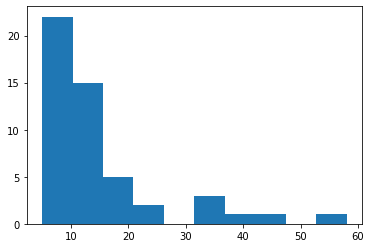

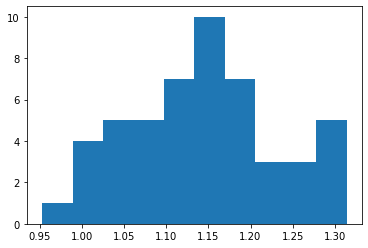

In [33]:
# Finding out the skew for each attribute

skew = df.skew()
print(skew)

# Removing the skew by using the boxcox transformations
transform = np.asarray(df['Liveness'])

df_transform = boxcox(transform)[0]

# Plotting a histogram to show the difference
plt.hist(df['Liveness'], bins=10)  # original data
plt.show()

plt.hist(df_transform, bins=10)  # corrected skew data
plt.show()

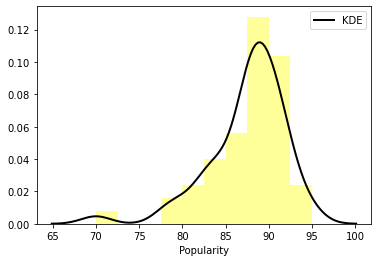

(array([ 1.,  3.,  7.,  3., 12., 11.,  7.,  3.,  1.,  2.]),
 array([1.44740398e+15, 3.38216964e+15, 5.31693529e+15, 7.25170095e+15,
        9.18646661e+15, 1.11212323e+16, 1.30559979e+16, 1.49907636e+16,
        1.69255292e+16, 1.88602949e+16, 2.07950605e+16]),
 <a list of 10 Patch objects>)

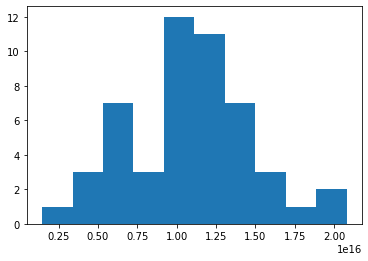

In [34]:
transform1=np.asarray(df['Popularity'])
df_transform1 = boxcox(transform1)[0]


sns.distplot(df['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='yellow')
plt.show()


plt.hist(df_transform1, bins=10)

In [35]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
print(correlation)

                  Unnamed: 0  beats_per_minute  Energy  Danceability  Loudness(dB)  Liveness  \
Unnamed: 0             1.000            -0.263   0.132         0.053        -0.086     0.102   
beats_per_minute      -0.263             1.000   0.012        -0.092         0.025    -0.033   
Energy                 0.132             0.012   1.000        -0.049         0.579     0.013   
Danceability           0.053            -0.092  -0.049         1.000         0.025    -0.261   
Loudness(dB)          -0.086             0.025   0.579         0.025         1.000     0.073   
Liveness               0.102            -0.033   0.013        -0.261         0.073     1.000   
Valence                0.113            -0.048   0.467         0.155         0.350    -0.187   
Length                 0.045            -0.198   0.189        -0.079         0.145     0.202   
Acousticness           0.058            -0.010  -0.211        -0.128        -0.096     0.204   
Speechiness           -0.232            

Text(0.5, 1.0, 'Genre vs Count of the tracks')

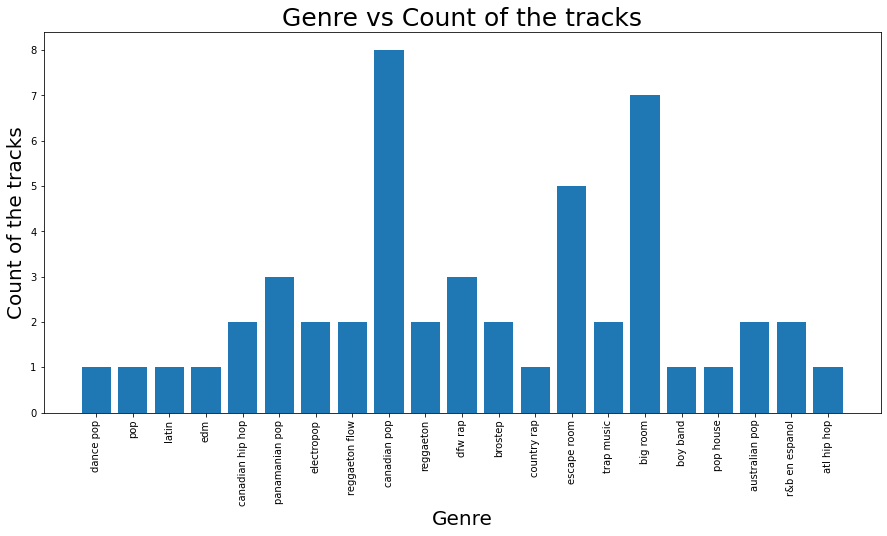

In [36]:
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('Genre')['track_name'].agg(len)
plt.figure(figsize = (15,7))
plt.bar(length, genre_groupby)
plt.xticks(length,xtick)
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Count of the tracks', fontsize = 20)
plt.title('Genre vs Count of the tracks', fontsize = 25)

In [37]:
# plt.xticks(df['Popularity'])
# plt.hist(df['Popularity'].value_counts(), bins=10,color= 'g' )

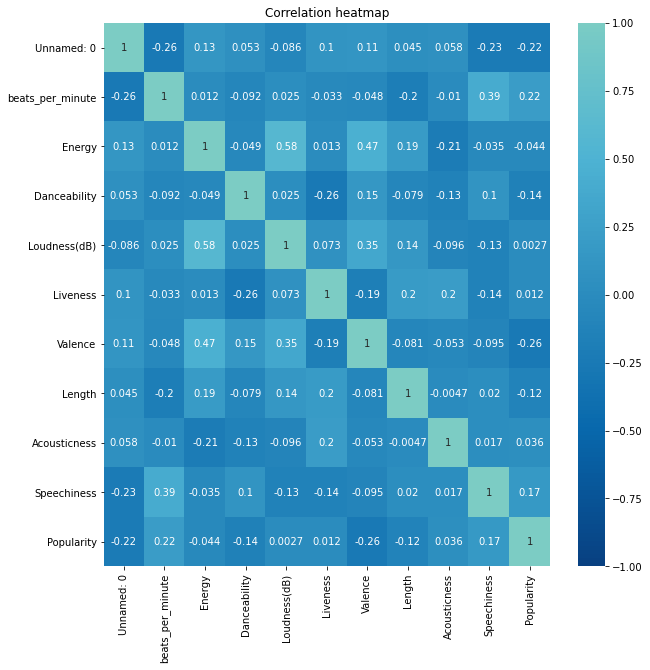

In [38]:
# heatmap of the correlation 
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

Text(0.5, 1.0, 'Artist Name vs Count of songs')

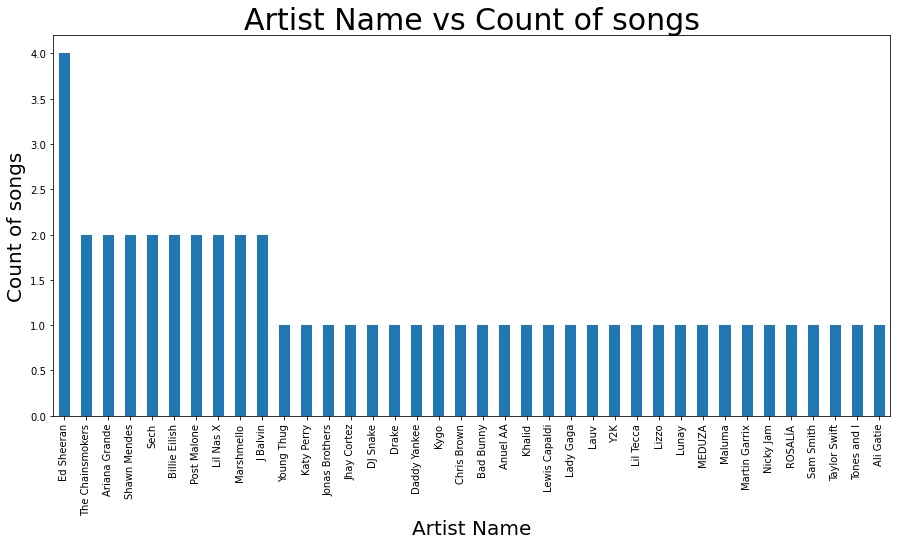

In [39]:
fig = plt.figure(figsize = (15,7))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

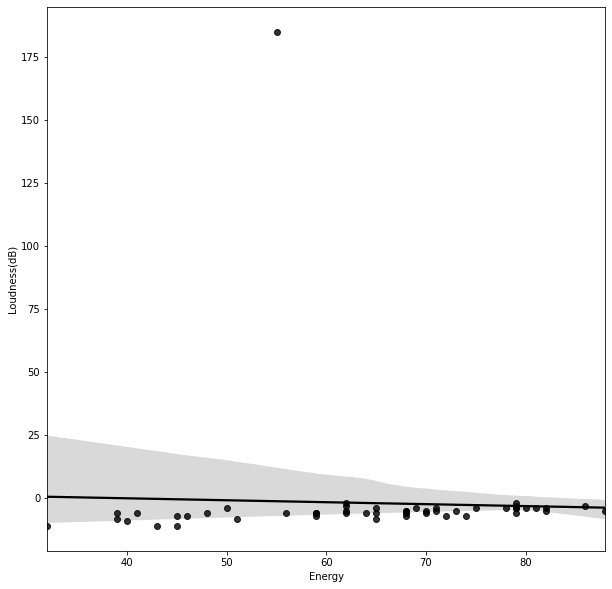

In [40]:
# Analysing the relationship between energy and loudness
fig = plt.subplots(figsize=(10, 10))
sns.regplot(x='Energy', y='Loudness(dB)', data=df, color='black')

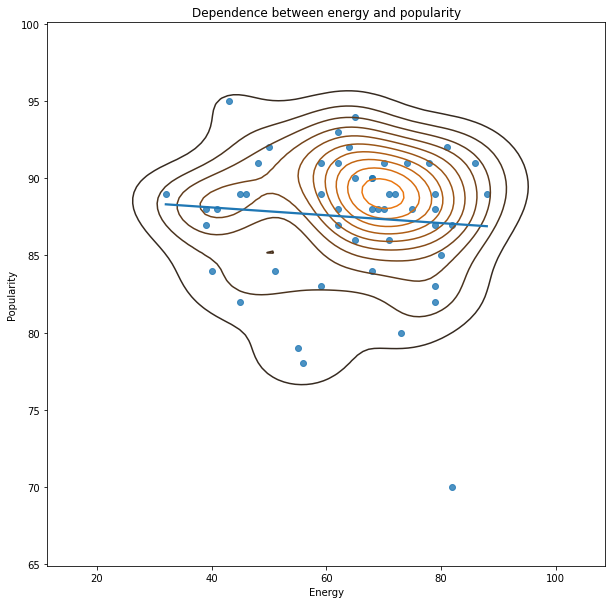

In [41]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=df)
sns.kdeplot(df.Energy,df.Popularity)

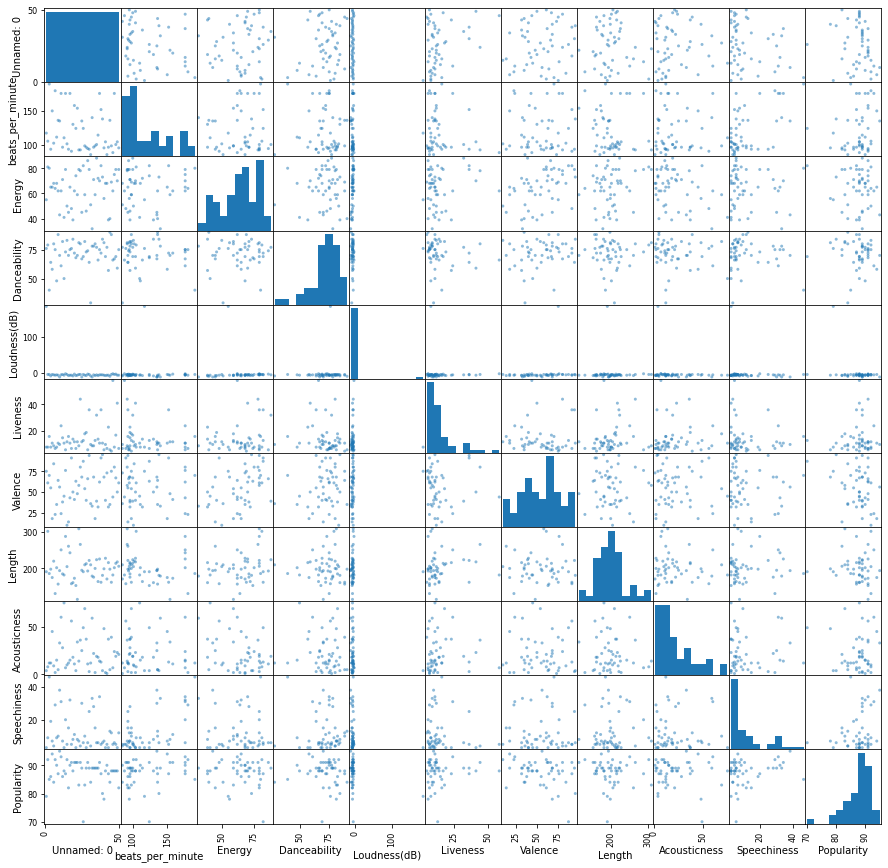

In [42]:
scatter_matrix(df)
plt.gcf().set_size_inches(15, 15)
plt.show()

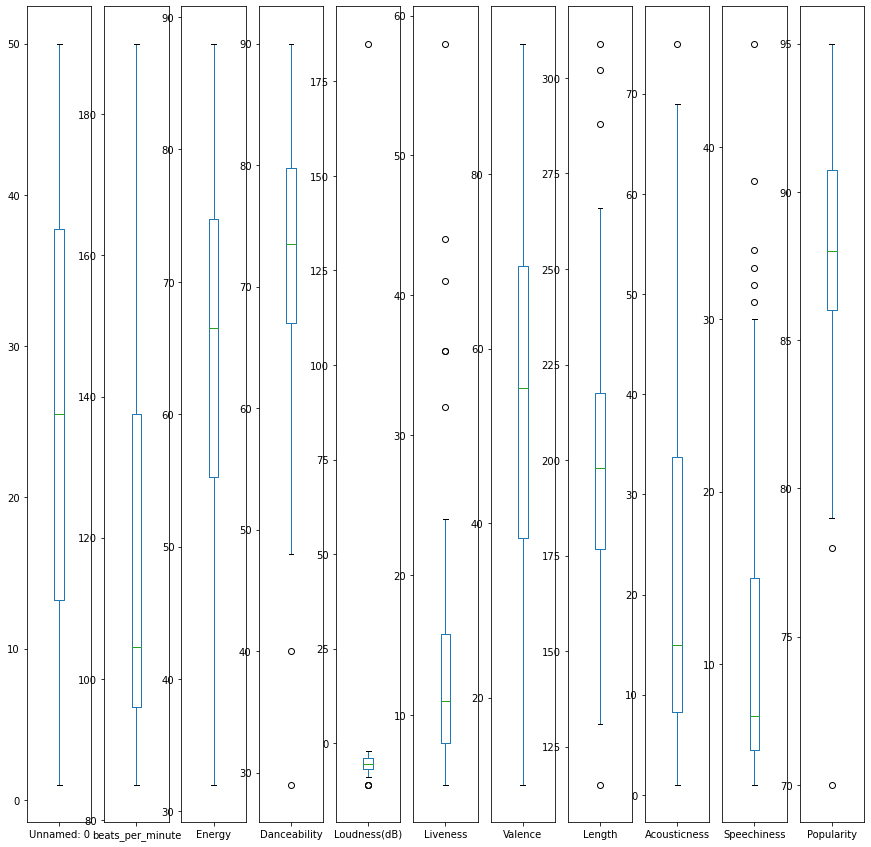

In [43]:
df.plot(kind='box', subplots=True)
plt.gcf().set_size_inches(15,15)
plt.show()

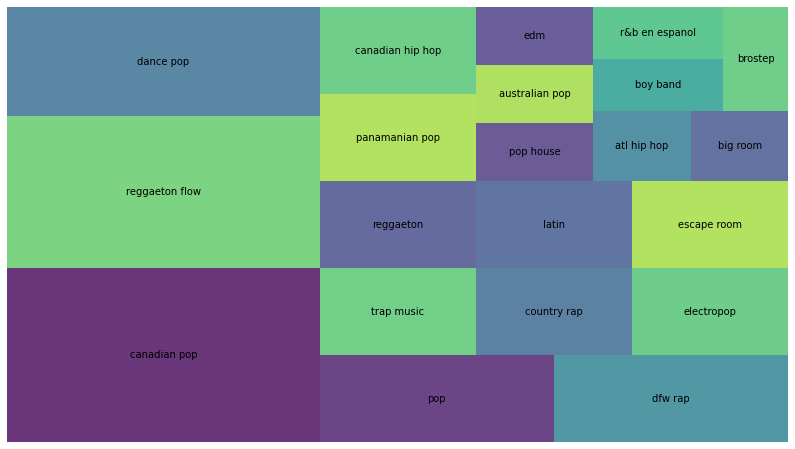

In [44]:
import squarify as sq

plt.figure(figsize=(14,8))
sq.plot(sizes=df.Genre.value_counts(), label=df["Genre"].unique(), alpha=.8 )
plt.axis('off')
plt.show()

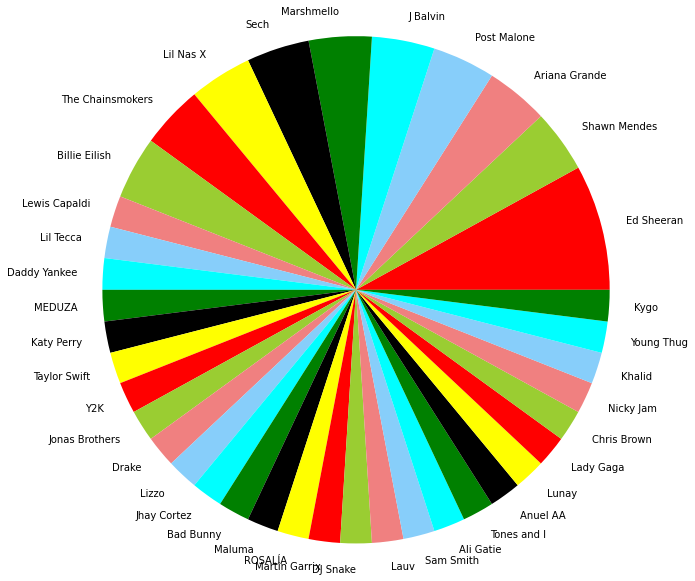

In [45]:
#Pie charts 
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [46]:
#Linear regression, first create test and train dataset
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [47]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [48]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

84.0603203753328
[ 0.06544314 -0.0063551  -0.00840172 -0.32072495  0.00327036]


In [49]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       91     87.499
1       88     87.351
2       89     87.183
3       92     88.602
4       70     88.827
5       91     88.595
6       80     88.400
7       86     88.849
8       87     89.254
9       91     89.444
10      79     26.251
11      82     89.016
12      91     87.205
13      89     89.279
14      94     87.905


In [50]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.705982969947873
Mean Squared Error: 223.81605421557245
Root Mean Squared Error: 14.960483087640334


Text(0, 0.5, 'Test values')

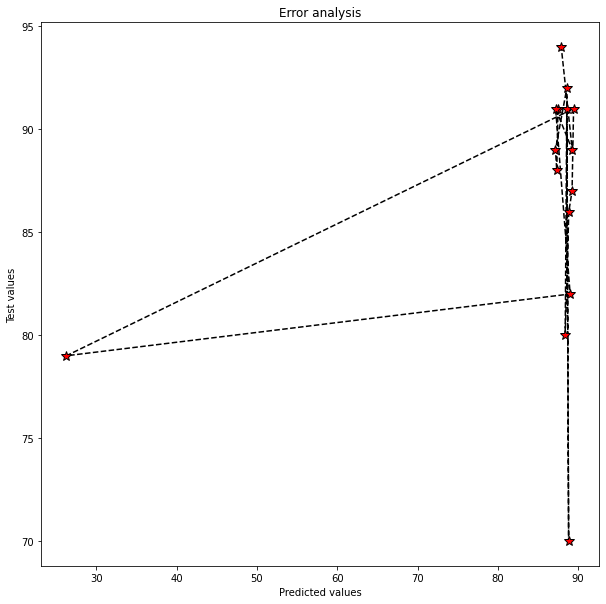

In [51]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [52]:
# Cross validation score
x=df.loc[:,['Energy','Danceability']].values
y=df.loc[:,'Popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=metrics.mean_squared_error(y_test, y_pred)-abs(mse_mean)
print(diff)

-17.74946414926474
206.0665900663077


In [53]:
x=df.loc[:,['artist_name']].values
y=df.loc[:,'Genre'].values

In [54]:
# Label encoding of features
x.shape
encoder=LabelEncoder()
x = encoder.fit_transform(x)
x=pd.DataFrame(x)
x

,0
0,32
1,1
2,2
3,9
4,28
5,9
6,20
7,30
8,19
9,4


In [55]:
# Label Encoding of target
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,6
1,19
2,8
3,15
4,9
5,15
6,20
7,15
8,7
9,11


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [57]:
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [58]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

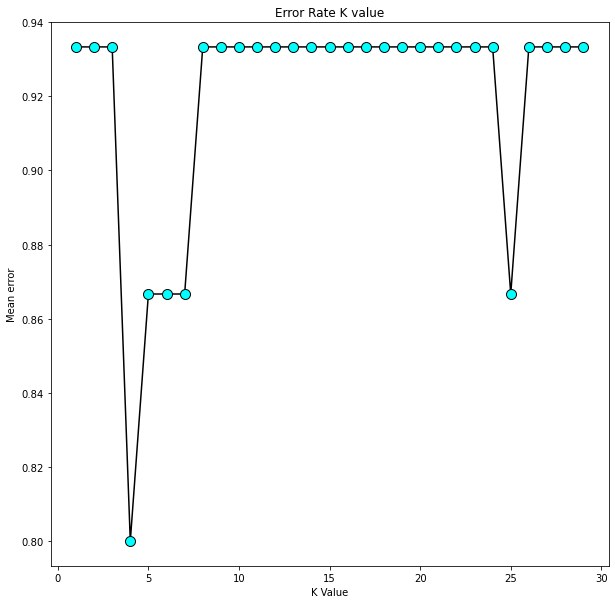

In [59]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='black',marker='o',markerfacecolor='cyan',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [60]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [61]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [62]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       87         92
1       86         83
2       88         89
3       82         88
4       84         88
5       89         88
6       93         89
7       89         92
8       90         91
9       87         89
10      89         89
11      84         90
12      89         88
13      85         88
14      91         88


In [63]:
# Testing the accuracy of Naive Bayes 
scores=cross_val_score(gnb,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

17.17171717171717


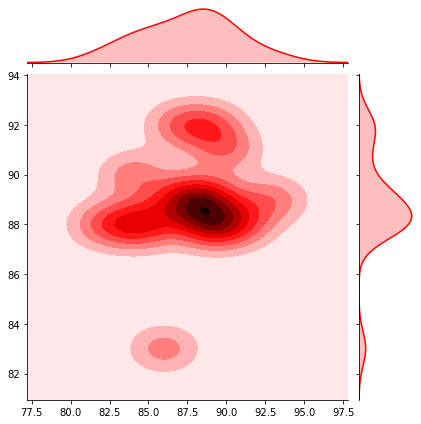

In [64]:
sns.jointplot(x=y_test, y=y_pred, kind="kde", color="r")

In [65]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [67]:
# Linear SVM model 
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       89         92
1       94         94
2       80         80
3       88         88
4       88         89
5       91         91
6       92         88
7       83         83
8       90         91
9       89         88
10      87         87
11      89         88
12      88         88
13      91         91
14      84         84


In [68]:
# Testing the accuracy
scores=cross_val_score(LinSVC,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

8.585858585858585


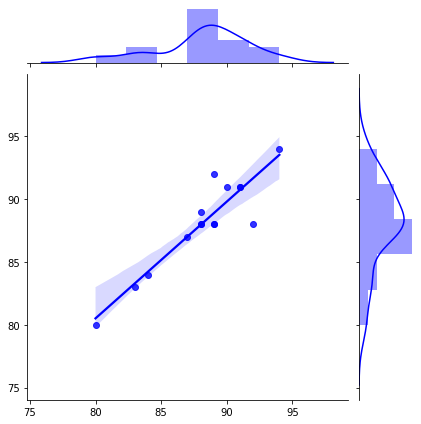

In [69]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="b");